In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer


In [45]:
df = pd.read_csv('housingdata.csv')
print(df)
df_median = df[:]

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

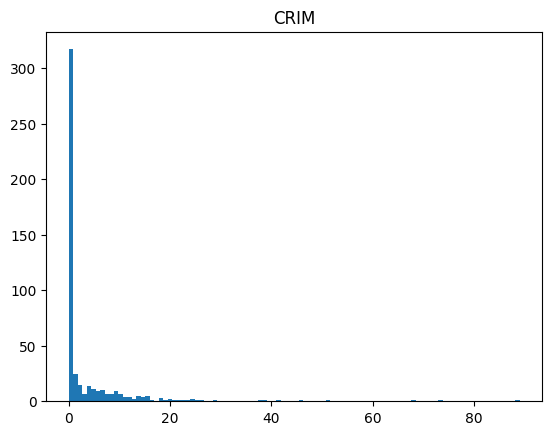

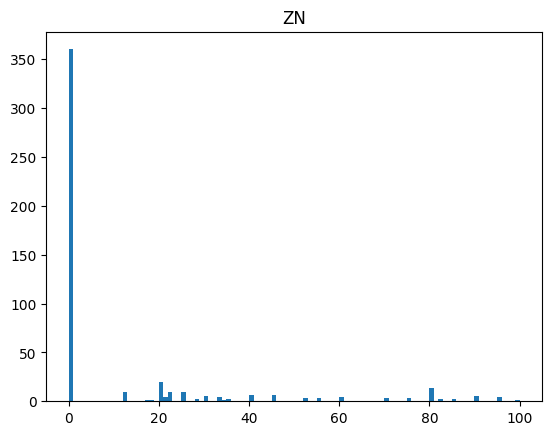

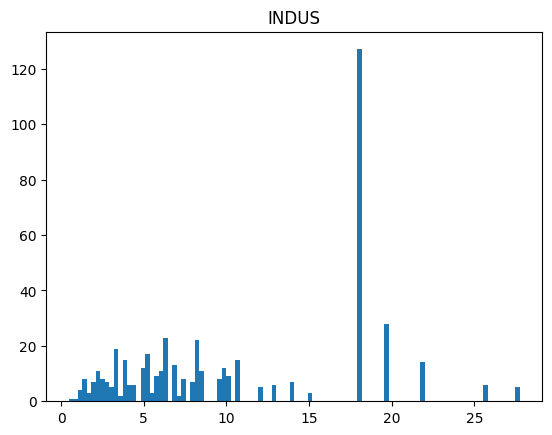

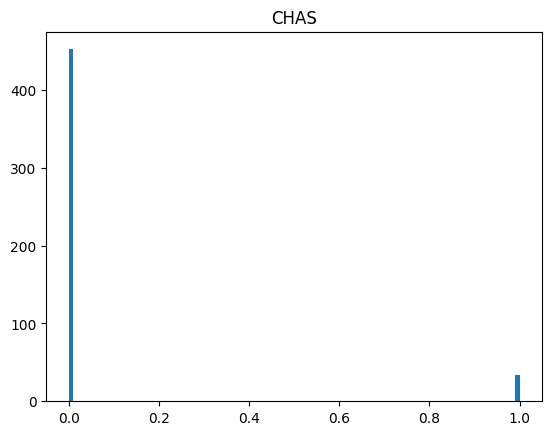

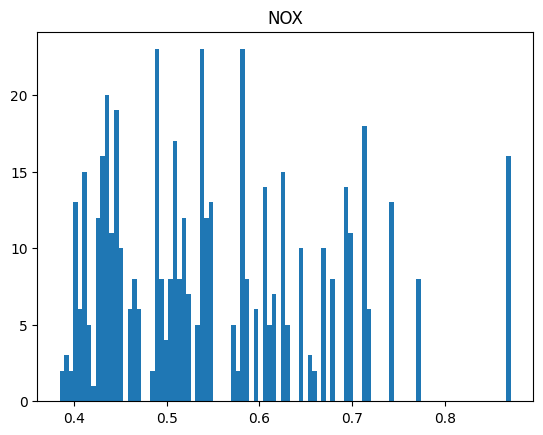

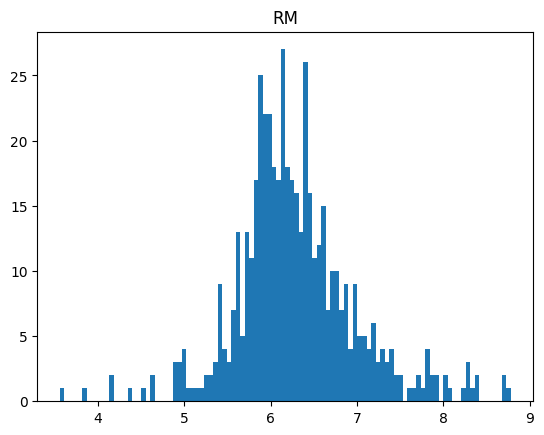

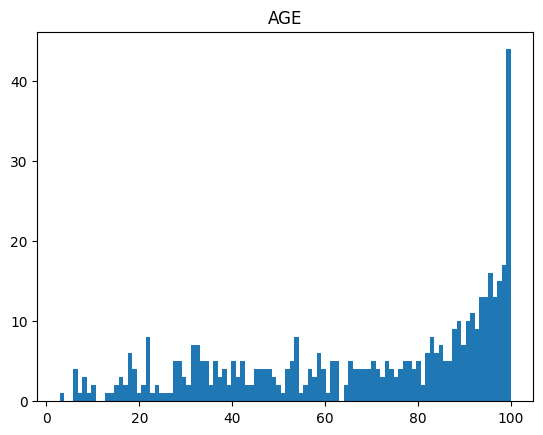

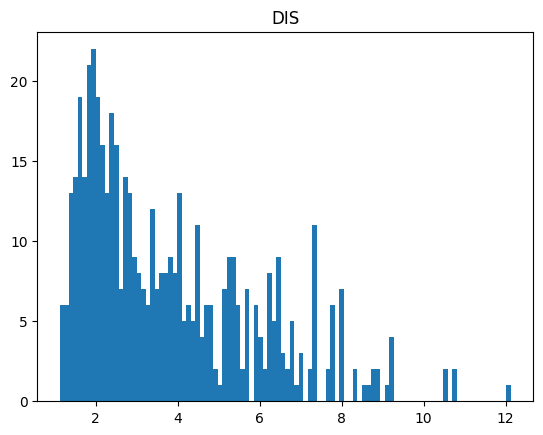

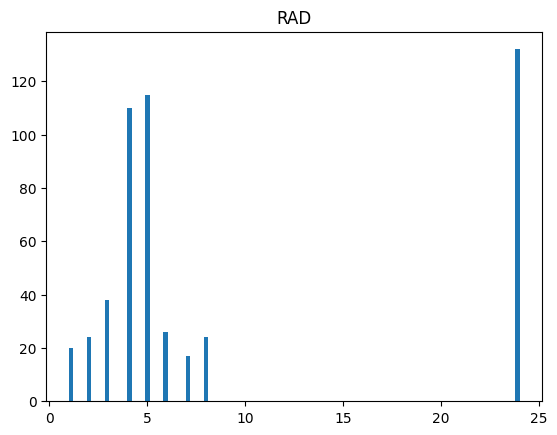

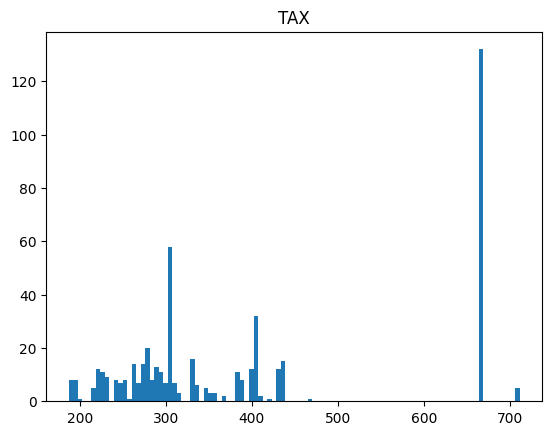

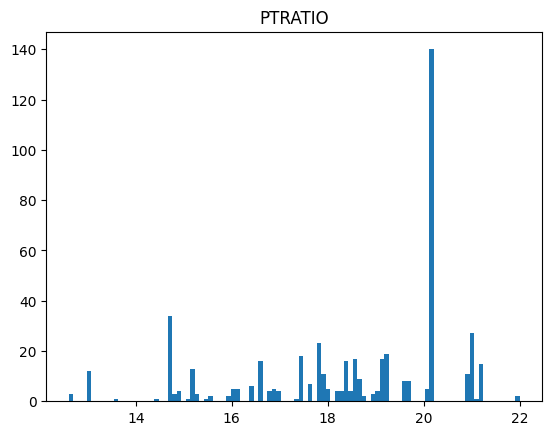

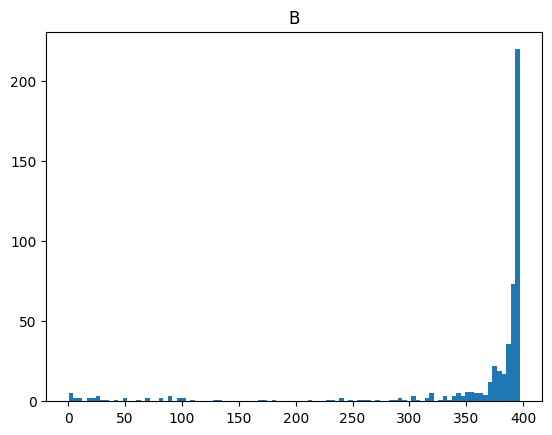

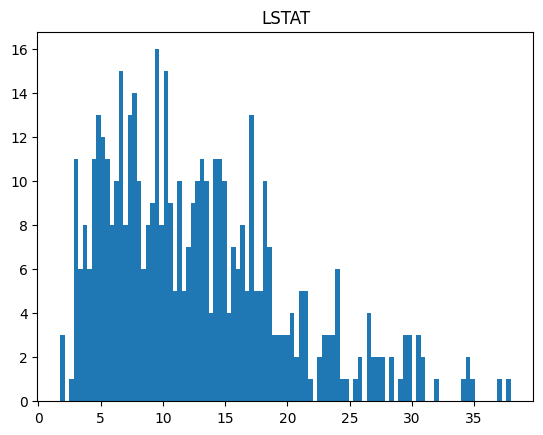

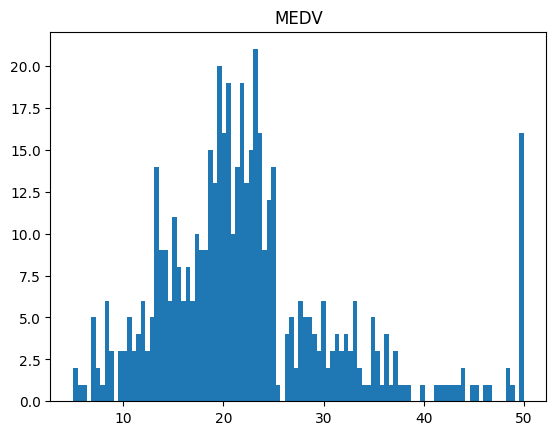

In [46]:
# 원본 데이터 확인 : 데이터의 분포
for i in df_median.columns:
    N = len(df[i])
    X = df[i]
    
    plt.hist(X,bins = 100, label = i)
    plt.title(i)
    plt.show()

###### 결측치를 제거하지 않고 대체하여 모델 학습

In [47]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'most_frequent')

# 결측치를 다른 값으로 대체
for i in df_median.columns:
    if df_median[i].isnull().sum() > 0:
        # CHAS 는 0 과 1로 구분되어 0으로 대체
        if i == 'CHAS':
            df_median[i] = df_median[i].fillna(0)
        else:
            df_median[i] = imputer1.fit_transform(df_median[[i]])

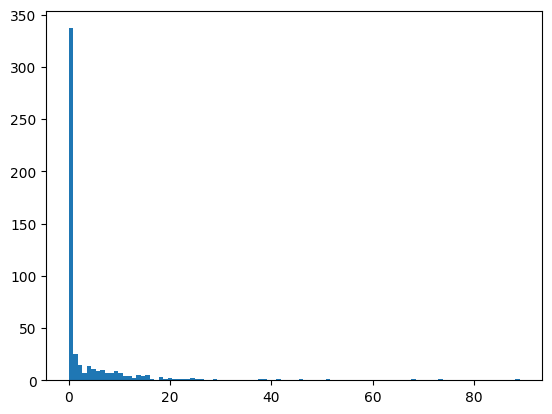

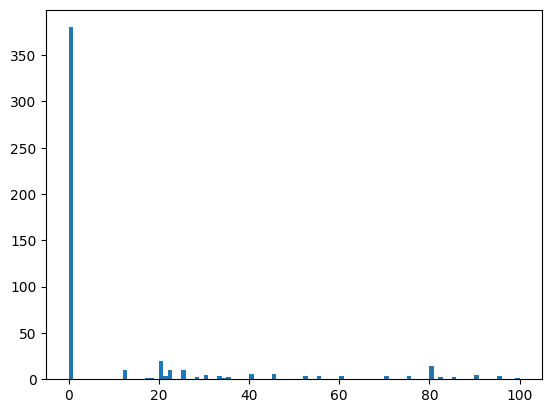

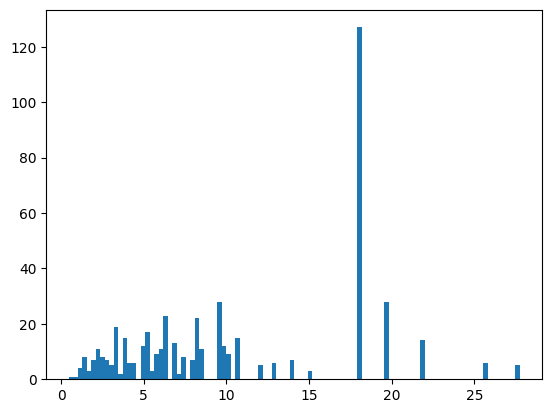

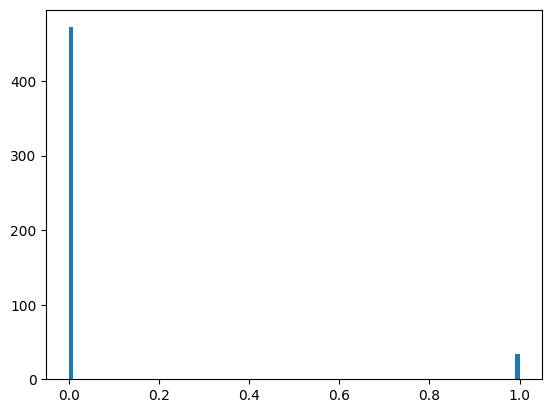

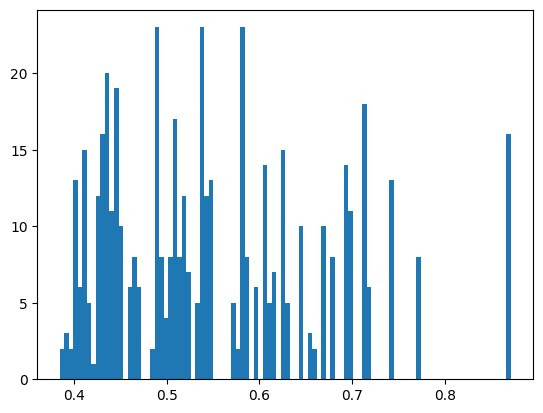

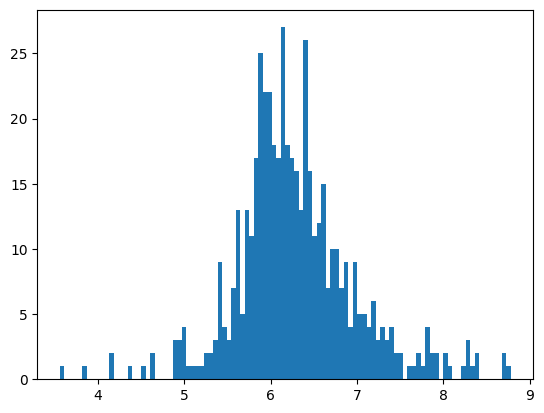

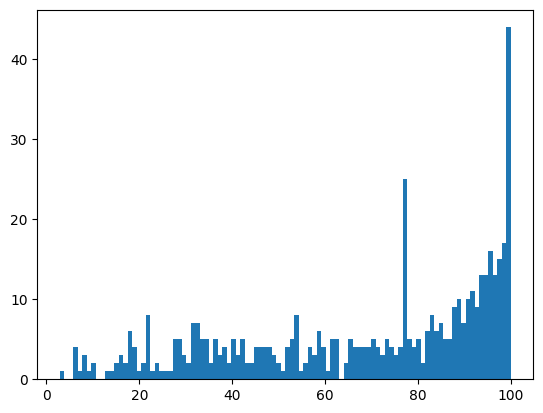

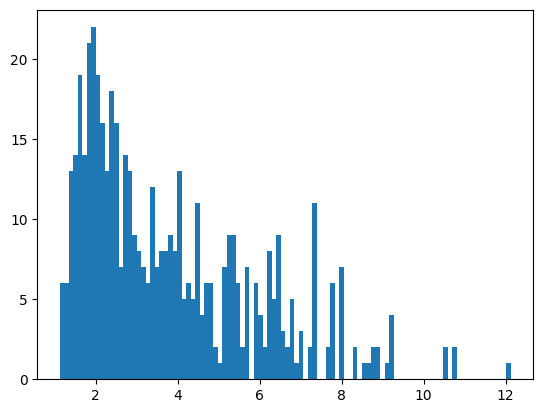

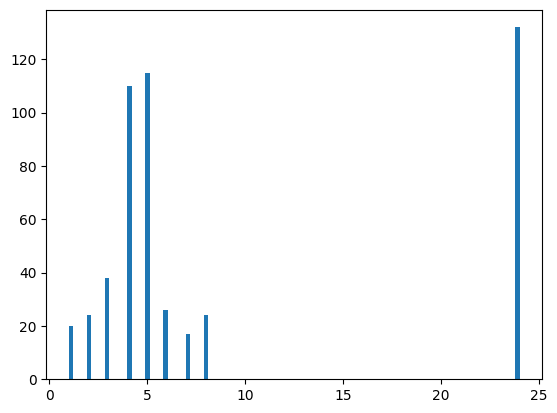

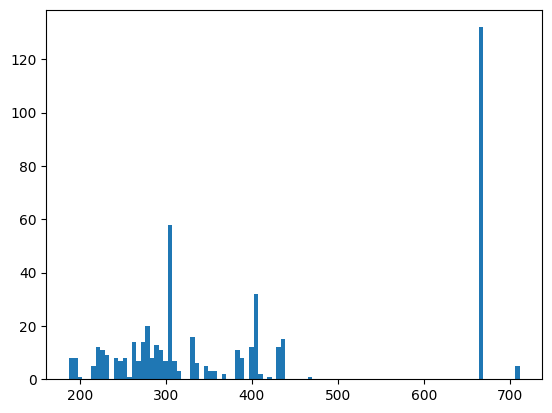

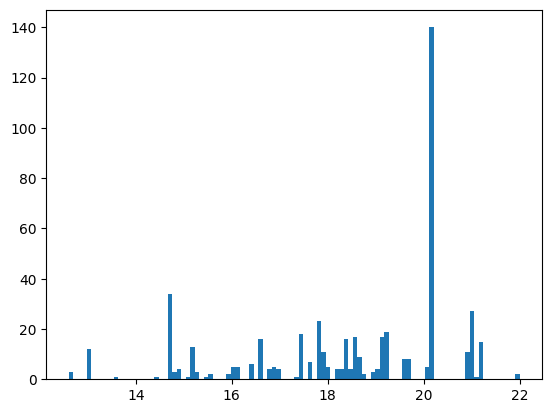

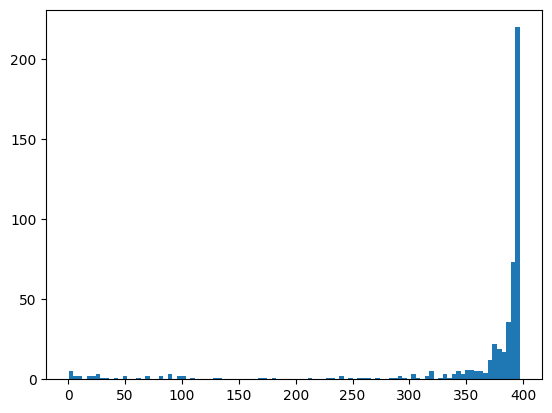

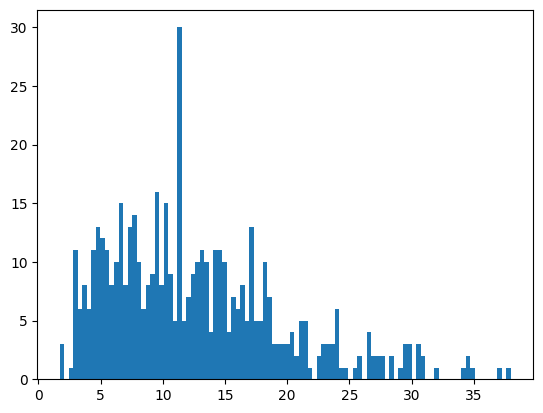

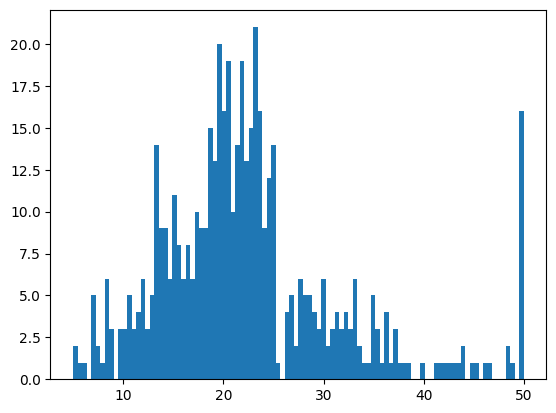

In [48]:
# 중앙값으로 대체한 후의 데이터 확인
for i in df_median.columns:
    N = len(df_median[i])
    X = df_median[i]
    
    plt.hist(X,bins = 100, label = i)
    plt.title(i)
    plt.show()

In [49]:
# 종속변수에 대한 각 컬럼의 상관관계 확인
corr_matrix = df_median.corr()
target_corr = corr_matrix['MEDV'].sort_values(ascending=False)
print(target_corr)

MEDV       1.000000
RM         0.695360
ZN         0.362292
B          0.333461
DIS        0.249929
CHAS       0.183844
AGE       -0.377572
RAD       -0.381626
CRIM      -0.383895
NOX       -0.427321
TAX       -0.468536
INDUS     -0.476394
PTRATIO   -0.507787
LSTAT     -0.723093
Name: MEDV, dtype: float64


In [50]:
# 'AGE', 'CHAS', 'B' 삭제
X = df_median[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df_median['MEDV']



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터의 이상치 제거
# for i in ['CRIM','ZN','INDUS','NOX','TAX']:
#     # IQR 계산
#     Q1 = X_train[i].quantile(0.25)
#     Q3 = X_train[i].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # IQR을 이용한 이상치 탐지
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     X_train[i] = X_train[i].clip(lower = lower_bound, upper = upper_bound)
    
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred_pl = model.predict(X_test)

# 모델 평가
mse_pl = mean_squared_error(y_test, y_pred_pl)
mae_pl = mean_absolute_error(y_test, y_pred_pl)
r2_pl = r2_score(y_test, y_pred_pl)
print(f'Mean Squared Error: {mse_pl}')
print(f'Mean Absolute Error: {mae_pl}')
print(f'R^2 Score: {r2_pl}')

Mean Squared Error: 23.377265206064948
Mean Absolute Error: 3.0665729815850007
R^2 Score: 0.6812210662177708


In [52]:
#의사결정나무 모델
X = df_median[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df_median['MEDV']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터의 이상치 제거
for i in ['CRIM','ZN','INDUS','NOX','TAX']:
    # IQR 계산
    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR을 이용한 이상치 탐지
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    X_train[i] = X_train[i].clip(lower = lower_bound, upper = upper_bound)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 생성 및 학습
df_model = DecisionTreeRegressor(random_state=42)
df_model.fit(X_train, y_train)

# # 예측
y_pred_df = df_model.predict(X_test)

# 평가
mse_dt = mean_squared_error(y_test, y_pred_df)
mae_dt = mean_absolute_error(y_test, y_pred_df)
r2_dt = r2_score(y_test, y_pred_df)
print(f'Mean Squared Error: {mse_dt}')
print(f'Mean Absolute Error: {mae_dt}')
print(f'R^2 Score: {r2_dt}')

Mean Squared Error: 25.61627450980392
Mean Absolute Error: 3.1176470588235294
R^2 Score: 0.6506893084487214


In [53]:
# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X = df_median[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df_median['MEDV']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 훈련 데이터의 이상치 제거
for i in ['CRIM','ZN','INDUS','NOX','TAX']:
    # IQR 계산
    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR을 이용한 이상치 탐지
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    X_train[i] = X_train[i].clip(lower = lower_bound, upper = upper_bound)


# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 학습
rf_model.fit(X_train_scaled, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test_scaled)

# 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'랜덤 포레스트 모델의 MSE: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')
print(f'R^2 Score: {r2_rf}')

랜덤 포레스트 모델의 MSE: 8.993810058823525
Mean Absolute Error: 2.126117647058823
R^2 Score: 0.8773578878487535


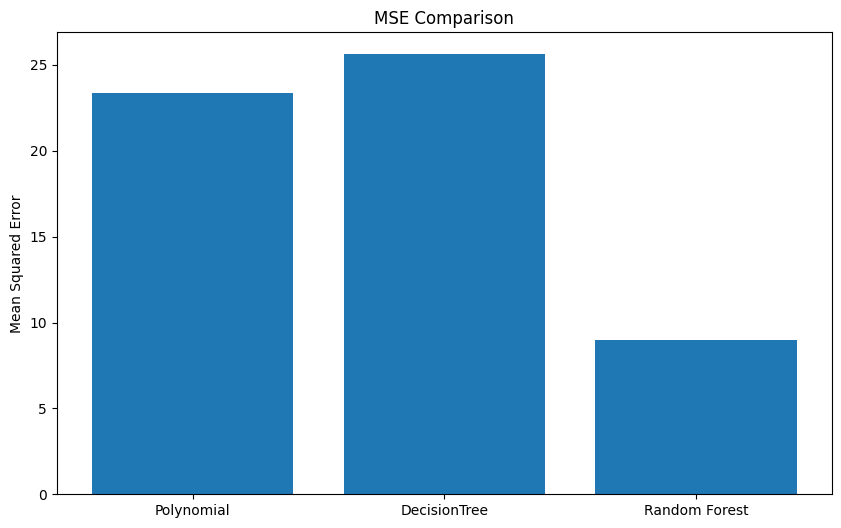

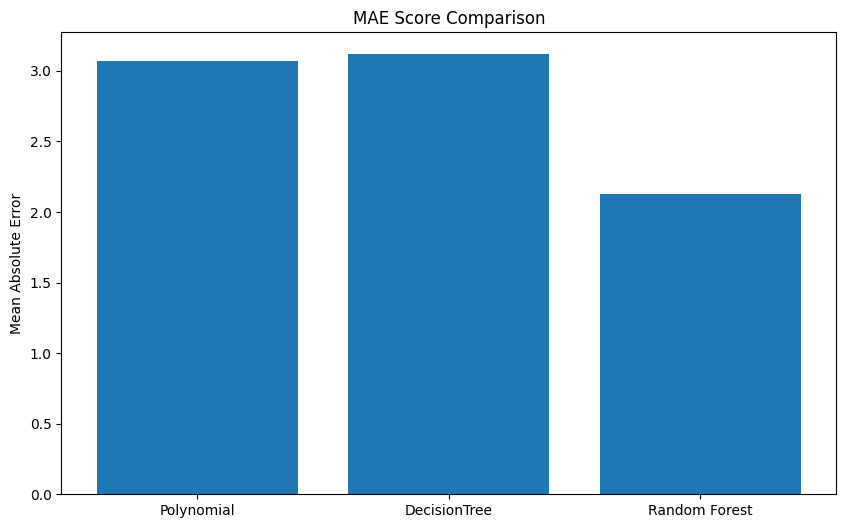

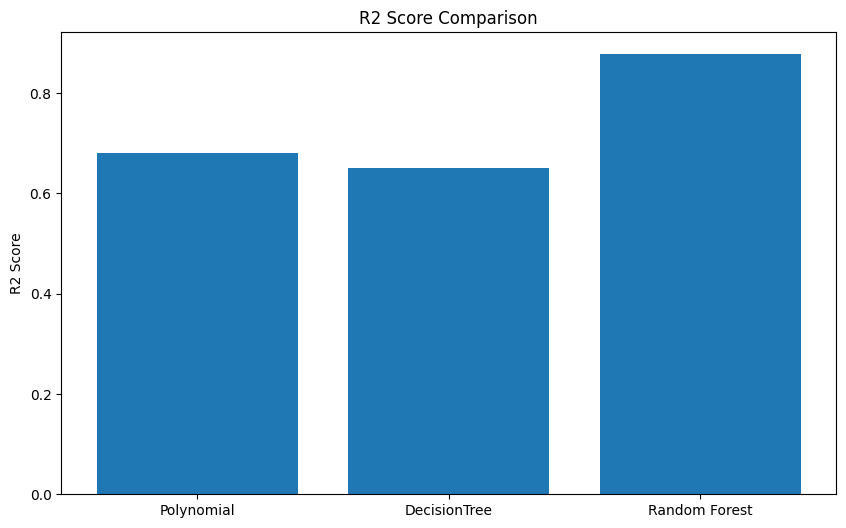

In [54]:
# 각 모델의 성능 지표 저장
models = ['Polynomial', 'DecisionTree', 'Random Forest']
mse_scores = [mse_pl, mse_dt, mse_rf]
r2_scores = [r2_pl, r2_dt, r2_rf]
mae_scores = [mae_pl, mae_dt, mae_rf]

# MSE 비교
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores)
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.show()

# MAE 비교
plt.figure(figsize = (10,6))
plt.bar(models, mae_scores)
plt.title('MAE Score Comparison')
plt.ylabel('Mean Absolute Error')
plt.show()

# R2 비교
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores)
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.show()

##### 데이터에서 결측치를 제거한 후 모델 학습

In [55]:
# 결측치 제거
df_without_na = df.dropna(axis = 0)
print(df_without_na)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [56]:
X = df_without_na[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df_without_na['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터의 이상치 제거
for i in ['CRIM','ZN','INDUS','NOX','TAX']:
    # IQR 계산
    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR을 이용한 이상치 탐지
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    X_train[i] = X_train[i].clip(lower = lower_bound, upper = upper_bound)

# 데이터 스케일링
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 다항 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse_pl = mean_squared_error(y_test, y_pred)
mae_pl = mean_absolute_error(y_test, y_pred)
r2_pl = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse_pl}')
print(f'Mean Absolute Error: {mae_pl}')
print(f'R^2 Score: {r2_pl}')


Mean Squared Error: 48.419988992397975
Mean Absolute Error: 3.8124349613978725
R^2 Score: 0.42593905020247136


In [57]:
# 결측치 제거, 의사결정나무 모델
X = df_without_na[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df_without_na['MEDV']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터의 이상치 제거
for i in ['CRIM','ZN','INDUS','NOX','TAX']:
    # IQR 계산
    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR을 이용한 이상치 탐지
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    X_train[i] = X_train[i].clip(lower = lower_bound, upper = upper_bound)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 및 학습
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# # 예측
y_pred = model.predict(X_test)

# 평가
mse_dt = mean_squared_error(y_test, y_pred)
mae_dt = mean_absolute_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse_dt}')
print(f'Mean Absolute Error: {mae_dt}')
print(f'R^2 Score: {r2_dt}')

Mean Squared Error: 24.34164556962026
Mean Absolute Error: 2.9835443037974687
R^2 Score: 0.7114086874839048


In [58]:
X = df_without_na[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df_without_na['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터의 이상치 제거
for i in ['CRIM','ZN','INDUS','NOX','TAX']:
    # IQR 계산
    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR을 이용한 이상치 탐지
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    X_train[i] = X_train[i].clip(lower = lower_bound, upper = upper_bound)


# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)



# 모델 학습
rf_model.fit(X_train_scaled, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test_scaled)

# 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'랜덤 포레스트 모델의 MSE: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')
print(f'R^2 Score: {r2_rf}')

랜덤 포레스트 모델의 MSE: 28.93135060759495
Mean Absolute Error: 2.742987341772154
R^2 Score: 0.6569937549690726


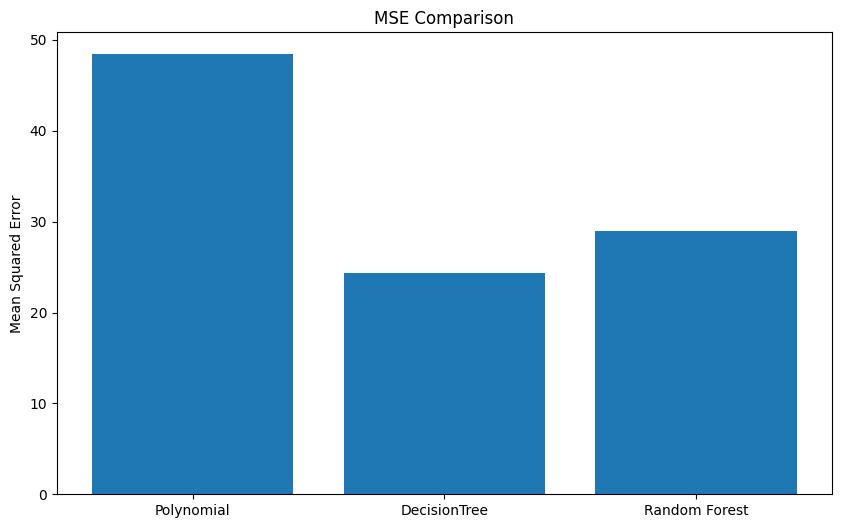

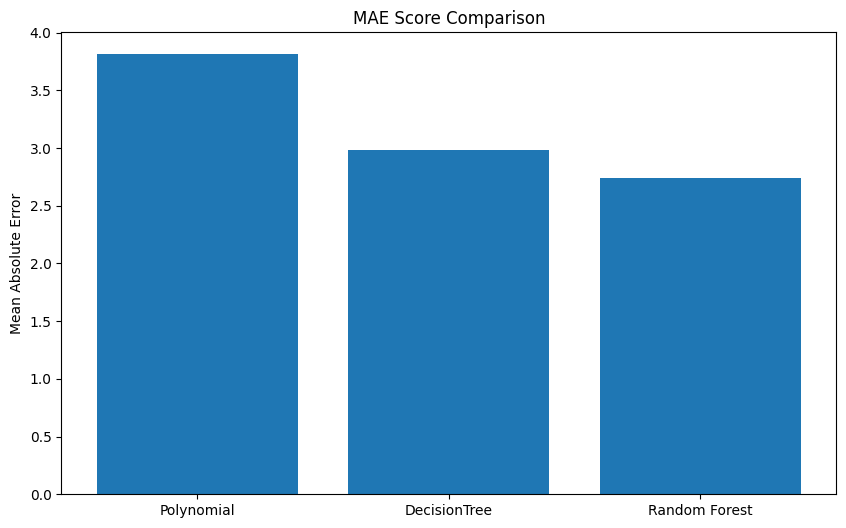

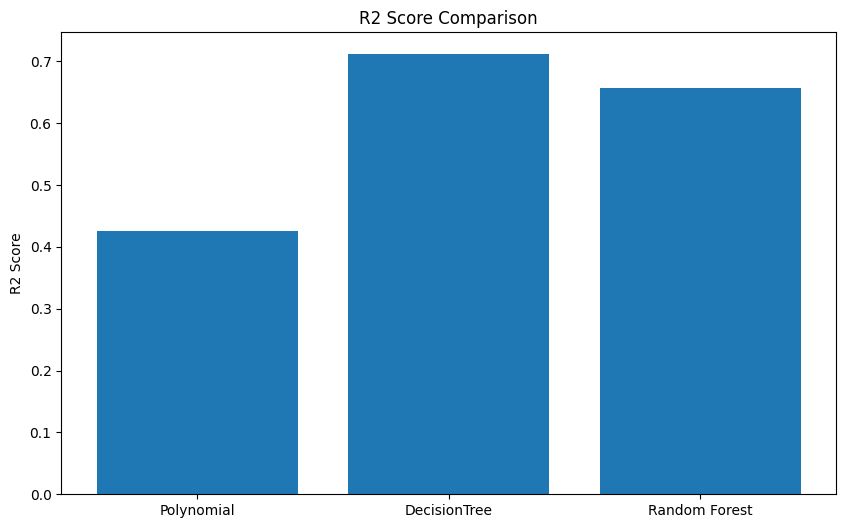

In [60]:
# 각 모델의 성능 지표 저장
models = ['Polynomial', 'DecisionTree', 'Random Forest']
mse_scores = [mse_pl, mse_dt, mse_rf]
r2_scores = [r2_pl, r2_dt, r2_rf]
mae_scores = [mae_pl, mae_dt, mae_rf]

# MSE 비교
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores)
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')
plt.show()

# MAE 비교
plt.figure(figsize = (10,6))
plt.bar(models, mae_scores)
plt.title('MAE Score Comparison')
plt.ylabel('Mean Absolute Error')
plt.show()

# R2 비교
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores)
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.show()

### 결론
- 결측치를 제거하는 것보다 평균값으로 대체하는 것이 더 좋은 성능을 보임.
- 랜덤 포레스트 모델의 성능이 가장 좋은 것을 볼 수 있음.

### 도전 문제

#### 배깅 & 부스팅 모델 생성

In [61]:
# 배깅모델 생성
from sklearn.ensemble import BaggingRegressor

bagging_model = BaggingRegressor(estimator = DecisionTreeRegressor(), n_estimators = 500, random_state = 42)

df = pd.read_csv('housingdata.csv')
df_median = df[:]

# 결측치를 평균값으로 대체
for i in df_median.columns:
    if df_median[i].isnull().sum() > 0:
        # CHAS 는 0 과 1로 구분되어 0으로 대체
        if i == 'CHAS':
            df_median[i] = df_median[i].fillna(0)
        else:
            df_median[i] = df_median[i].fillna(df[i].median())
            
# 평균값으로 대체
for i in df_median.columns:
    N = len(df_median[i])
    X = df_median[i]
    

# 'AGE', 'CHAS', 'B' 삭제
X = df_median[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df_median['MEDV']


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터의 이상치 제거
for i in ['CRIM','ZN','INDUS','NOX','TAX']:
    # IQR 계산
    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR을 이용한 이상치 탐지
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    X_train[i] = X_train[i].clip(lower = lower_bound, upper = upper_bound)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 학습
bagging_model.fit(X_train_scaled, y_train)

# 예측
y_pred_bagging = bagging_model.predict(X_test_scaled)

#평가
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)
print(f'Mean Squared Error: {mse_bagging}')
print(f'Mean Absolute Error: {mae_bagging}')
print(f'R^2 Score: {r2_bagging}')

Mean Squared Error: 9.586481551372499
Mean Absolute Error: 2.105925490196077
R^2 Score: 0.8692760534334572


##### BaggingRegressor 모델
  - n_estimators 의 값을 500까지 늘려도 r2_score가 0.88 이상으로 나오지 않았음.

In [66]:
# 그래디언트 부스팅 머신 (GBM)
from sklearn.ensemble import GradientBoostingRegressor


# GBM 모델 생성
gbm_model = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1, max_depth=5, random_state=42)

# 모델 학습
gbm_model.fit(X_train_scaled, y_train)

# 예측
y_pred_gbm = gbm_model.predict(X_test_scaled)

# 평가
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)
print(f'GBM 모델의 MSE: {mse_gbm}')
print(f'GBM 모델의 MAE: {mae_gbm}')
print(f'GBM 모델의 R^2 Score: {r2_gbm}')

GBM 모델의 MSE: 6.700064492680864
GBM 모델의 MAE: 2.0053776293617847
GBM 모델의 R^2 Score: 0.9086360446176202


#### 그래디언트 부스팅 머신
  - max_depth 의 값을 5로 설정하였을 때 r2_score 가 0.9가 넘어감을 볼 수 있음.

### XGBoost 모델

In [63]:
import xgboost as xgb

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)

# 모델 학습
xgb_model.fit(X_train_scaled, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost 모델의 MSE: {mse_xgb}')
print(f'XGBoost 모델의 MAE: {mae_xgb}')
print(f'XGBoost 모델의 R^2 Score: {r2_xgb}')


XGBoost 모델의 MSE: 6.111956085861153
XGBoost 모델의 MAE: 1.9203866285436293
XGBoost 모델의 R^2 Score: 0.9166556555182876


##### 결과
  - XGBoost 모델의 성능이 이전 모델들보다 훨씬 좋은 성능을 보이고 있는 걸 확인할 수 있다.

#### 하이퍼파라미터 튜닝
  - 위에서 학습을 진행한 모델 중 R2 Score가 XGBoostregressor를 제외하고 가장 성능이 좋았던 GradientBoosting 모델을 사용
  - max_depth의 값을 [3, 4, 5], [2, 3, 4]로 진행

In [64]:
# GradientBoosting 모델 하이퍼파라미터 튜닝
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [2, 3, 4],
    'random_state': [34, 42, 50]
}

gb = GradientBoostingRegressor()
grid_gb = GridSearchCV(
    gb, 
    gb_params, 
    cv=5,
    scoring='r2'
)
grid_gb.fit(X_train_scaled, y_train)

print("Best GradientBoosting parameters:", grid_gb.best_params_)
print("Best score:", grid_gb.best_score_)


Best GradientBoosting parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'random_state': 42}
Best score: 0.8414140903775105


In [65]:
# RandomSearch 기법으로 RandomForest 모델 하이퍼파라미터 튜닝


rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10, 0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 2. RandomForest 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 3. RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=100,  # 시도할 파라미터 조합의 수
    cv=5,        # 교차 검증 폴드 수
    scoring='r2',
    n_jobs=-1,   # 모든 CPU 사용
    random_state=42
)

# 4. 모델 학습
random_search.fit(X_train_scaled, y_train)

# 5. 결과 출력
print("Best parameters:", random_search.best_params_)
print("Best R² score:", random_search.best_score_)

# 6. 테스트 세트로 최종 성능 평가
best_rf = random_search.best_estimator_
test_score = best_rf.score(X_test_scaled, y_test)
print("Test set R² score:", test_score)

c:\Users\ROG\Desktop\sparta\practice_ml\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ROG\Desktop\sparta\practice_ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ROG\Desktop\sparta\practice_ml\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\ROG\Desktop\sparta\practice_ml\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_co

Best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best R² score: 0.8223778159254189
Test set R² score: 0.8647133719757494


#### 정리
  - RandomSearch 방법으로 RandomForest 모델을 학습시켰을 때, 500번 중에 296번의 실패가 있었고, 성공한 204번의 학습을 통해 R2 score가 0.86이 나왔다.
  - 하이퍼파라미터 튜닝을 한 모델들의 R2 score가 이전 모델들의 학습보다 낮은 이유는 k-fold 검증을 이용하여 그에 따른 평균을 나타내기에 낮을 수 있지만, 여러 번의 검증을 하여 나온 결과로 더 정확성이 높다고 볼 수 있다.

### 결론
  - 일반 과제에서 가장 좋은 성능을 보인 모델은 RandomForest 모델로 결측치를 제거하지 않고 중간값으로 대체한 후 이상치를 처리한 데이터로 학습을 시킨 것이 가장 좋은 성능을 보여줬다.
  - 도전과제에서 앙상블 모델에서는 XGBoost 모델의 성능이 가장 좋았으며, 하이퍼파라미터를 진행한 두 모델 중에서는 RandomSearch 기법으로 진행한 RandomForest가 가장 좋은 성능을 보여주었다.